In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

train = pd.read_csv('/content/drive/My Drive/cvision_1/train.csv')
test = pd.read_csv('/content/drive/My Drive/cvision_1/test.csv')
submission = pd.read_csv('/content/drive/My Drive/cvision_1/submission.csv')
train

,id,digit,letter,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,4,4,3,0,4,3,3,3,4,4,0,0,1,1,3,4,0,4,2,0,4,0,1,3,1,0,4,1,1,3,...,4,3,4,1,3,0,0,1,3,3,3,0,3,2,2,1,0,1,0,0,3,0,0,4,2,0,3,4,1,1,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,1,4,2,0,3,4,0,0,2,3,4,0,3,4,3,0,2,2,1,4,2,3,3,4,1,2,4,2,0,3,...,4,2,3,0,0,0,0,4,3,2,2,4,2,1,1,1,3,3,1,2,4,4,4,2,2,4,4,0,4,2,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,0,2,1,3,2,2,2,4,1,1,4,1,0,1,3,4,2,2,2,4,1,1,2,0,3,0,2,3,4,0,...,3,0,4,0,3,0,2,0,1,4,2,3,4,4,4,0,2,0,4,4,1,3,0,3,2,0,2,3,0,2,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,3,4,3,1,0,3,2,2,0,3,4,1,0,4,1,2,2,3,2,2,0,2,0,3,0,3,2,4,0,0,...,0,3,0,1,4,1,3,1,2,1,1,1,2,2,2,4,3,4,3,0,4,1,2,4,1,4,0,1,0,4,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,4,2,4,2,1,4,1,1,4,4,0,2,3,4,4,3,3,3,3,4,1,0,3,0,3,0,0,0,1,1,...,2,1,3,2,1,4,2,3,2,2,1,0,4,2,2,1,2,1,0,3,2,2,2,2,1,4,2,1,2,1,4,4,3,2,1,3,4,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,2044,6,V,2,4,3,4,2,4,4,1,2,1,3,3,4,4,3,4,1,0,4,4,4,1,1,1,2,3,4,1,2,3,3,2,3,1,3,4,0,...,2,4,1,1,1,1,2,3,1,2,0,2,4,1,0,3,4,4,0,1,3,3,3,3,2,0,3,3,3,2,0,2,2,0,0,1,3,1,4,0
2044,2045,1,L,3,2,2,1,1,4,0,1,4,2,0,3,3,2,2,1,2,3,2,2,4,1,0,4,1,0,2,0,3,0,2,3,3,3,4,0,4,...,0,1,1,1,1,3,0,4,2,0,4,3,1,4,0,1,0,0,3,3,0,0,1,3,3,1,2,0,3,2,2,3,4,2,1,2,3,4,1,1
2045,2046,9,A,4,0,4,0,2,4,4,4,3,4,0,1,3,4,1,0,2,2,0,0,3,3,2,0,4,3,2,3,4,3,1,1,4,4,4,1,1,...,3,2,4,3,2,1,1,0,4,0,4,4,1,3,3,1,3,4,1,0,2,4,1,2,4,4,4,3,4,2,2,3,1,1,3,4,2,2,0,0
2046,2047,0,Z,2,3,3,0,3,0,4,3,0,1,4,0,0,0,2,3,1,1,1,0,2,4,1,0,3,0,1,2,4,1,4,3,1,4,4,4,0,...,0,0,2,0,2,3,2,0,3,0,1,0,1,0,1,2,3,2,1,1,0,0,3,1,4,1,1,2,1,3,2,3,1,1,0,4,1,4,3,1


In [1]:
#local 연결 전용

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

train = pd.read_csv('data/cvision/train.csv')
test = pd.read_csv('data/cvision/test.csv')
submission = pd.read_csv('data/cvision/submission.csv')
train

,id,digit,letter,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,...,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,...,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,...,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,...,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,...,4,4,3,2,1,3,4,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,2044,6,V,2,4,3,4,2,4,4,...,0,2,2,0,0,1,3,1,4,0
2044,2045,1,L,3,2,2,1,1,4,0,...,2,3,4,2,1,2,3,4,1,1
2045,2046,9,A,4,0,4,0,2,4,4,...,2,3,1,1,3,4,2,2,0,0
2046,2047,0,Z,2,3,3,0,3,0,4,...,2,3,1,1,0,4,1,4,3,1


In [2]:
#X와 y 분리
X = train.drop(['id','digit','letter'], axis=1).values
X = X.reshape(-1, 28, 28, 1)
X = X/255.

y = train['digit']
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)

In [3]:
#train과 valid로 분리
from sklearn.model_selection import train_test_split

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=0)

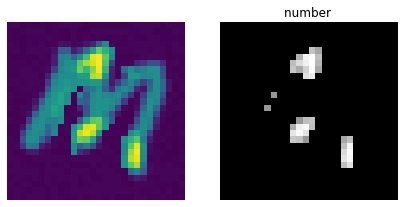

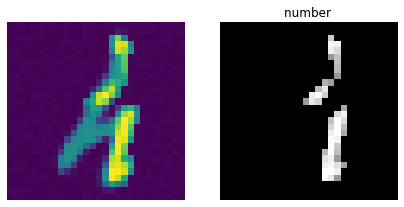

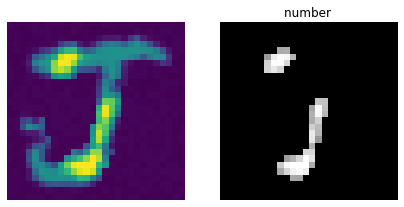

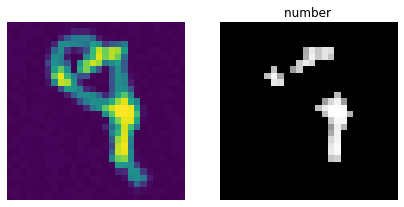

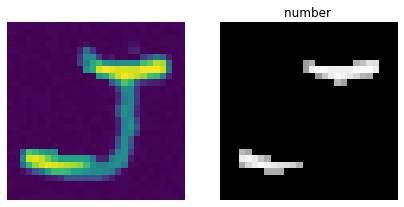

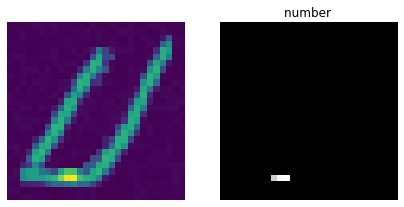

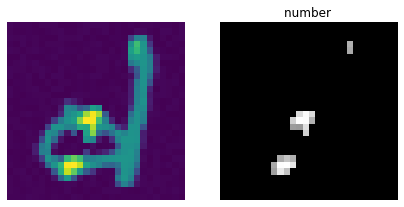

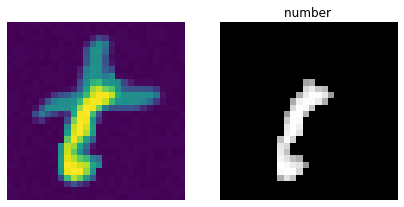

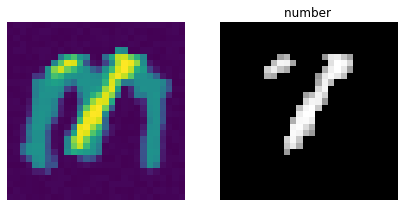

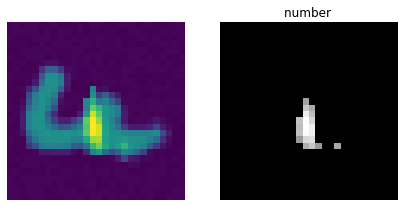

In [ ]:
#그림 시각화
data = np.where(train_X >= 150/255., train_X, 0)

for i in range(10):
    plt.figure(figsize=(7,7))
    
    plt.subplot(1,2,1)
    plt.imshow(train_X[i].reshape(28,28))
    plt.axis('off')
    
    plt.subplot(1,2,2)
    plt.imshow(data[i,:,:,0], cmap='gray')
    plt.axis('off')
    plt.title('number ' + str())

In [ ]:
#숫자 있는 부분만 추출 (이걸로만 딥러닝해보니 성과 매우 안 좋음,
#이 방식 적용할 거면 train, valid, test 모두 이런 형식으로 변형한 후 해야할 듯)

#train_X = np.where(train_X >= 150/255., train_X, 0)

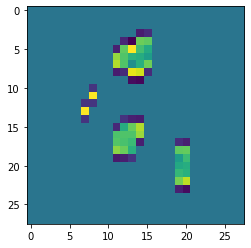

In [ ]:
#별 거 아님 kernel 예시
from scipy.signal import correlate2d

kernel = np.array(
[
    [0, -100, 0],
    [0, 255, 0],
    [0,-100,0]
])
plt.imshow(correlate2d(train_X[0].reshape(28,28), kernel, mode='same'))

In [ ]:
#model_4: 0.8284
from tensorflow import keras
from tensorflow.keras import layers
#from kerastuner.tuners import RandomSearch

from keras import Sequential, Model
from keras.optimizers import Adam

from tensorflow.keras.layers import (
    Conv2D, BatchNormalization, Dropout, MaxPool2D,
    Flatten, Dense, Input, Concatenate, LeakyReLU, Add
)

#데이터 증강
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=10, #10도 돌림
                            zoom_range=0.10, #10퍼센트 확대(crop?)
                            width_shift_range=0.1,
                            height_shift_range=0.1)

def model_fn():
    model = Sequential()
    model.add(Conv2D(32,kernel_size=3, activation='relu', input_shape = train_X.shape[1:]))
    model.add(Conv2D(32,kernel_size=3, activation='relu'))
    model.add(Conv2D(32,kernel_size=3, strides=2, padding='same', activation='relu'))
    model.add(Dropout(0.3))

    model.add(Conv2D(64,kernel_size=3, activation='relu'))
    model.add(Conv2D(64,kernel_size=3, activation='relu'))
    model.add(Conv2D(64,kernel_size=3, strides=2, padding='same', activation='relu'))
    model.add(Dropout(0.3))

    model.add(Conv2D(128,kernel_size=4, activation='relu'))
    model.add(Flatten())
    model.add(Dropout(0.3))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
#model_5
from tensorflow import keras
from tensorflow.keras import layers
#from kerastuner.tuners import RandomSearch

from keras import Sequential, Model
from keras.optimizers import Adam

from tensorflow.keras.layers import (
    Conv2D, BatchNormalization, Dropout,
    Flatten, Dense, Input, Concatenate, LeakyReLU, Add,
    Activation, BatchNormalization, MaxPooling2D
)

#데이터 증강
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=10, #10도 돌림
                            zoom_range=0.10, #10퍼센트 확대(crop?)
                            width_shift_range=0.1,
                            height_shift_range=0.1)

def model_fn():
    model = Sequential()
    
    model.add(Conv2D(input_shape = train_X.shape[1:], filters = 32, kernel_size = (3,3), strides = 2, padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.3))


    model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Flatten())

    model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model = model_fn()
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_106 (Conv2D)          (None, 14, 14, 32)        320       
_________________________________________________________________
batch_normalization_50 (Batc (None, 14, 14, 32)        128       
_________________________________________________________________
activation_49 (Activation)   (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 14, 14, 32)        9248      
_________________________________________________________________
batch_normalization_51 (Batc (None, 14, 14, 32)        128       
_________________________________________________________________
activation_50 (Activation)   (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 14, 14, 32)      

In [ ]:
#각 epoch마다 learning rate 낮춰줌
from tensorflow.keras.callbacks import LearningRateScheduler
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.975 ** x)

In [ ]:
epochs = 120
batch_size = 32

history = model.fit_generator(
    datagen.flow(train_X, train_y, batch_size=batch_size),
    epochs = epochs,
    steps_per_epoch=train_X.shape[0]//batch_size,
    validation_data=(valid_X,valid_y),
    verbose=1
    #callbacks=[annealer],
)

print(
    f"CNN: Epochs={epochs:d}, " +
    f"Train accuracy={max(history.history['accuracy']):.5f}, " +
    f"Validation accuracy={max(history.history['val_accuracy']):.5f}"
)

Epoch 1/120
51/51 [==============================] - 4s 87ms/step - loss: 2.5230 - accuracy: 0.1227 - val_loss: 2.2927 - val_accuracy: 0.1341
Epoch 2/120
51/51 [==============================] - 4s 85ms/step - loss: 2.2891 - accuracy: 0.1308 - val_loss: 2.2962 - val_accuracy: 0.1000
Epoch 3/120
51/51 [==============================] - 4s 87ms/step - loss: 2.2502 - accuracy: 0.1326 - val_loss: 2.3043 - val_accuracy: 0.1220
Epoch 4/120
51/51 [==============================] - 5s 89ms/step - loss: 2.2317 - accuracy: 0.1606 - val_loss: 2.2817 - val_accuracy: 0.1439
Epoch 5/120
51/51 [==============================] - 4s 86ms/step - loss: 2.1931 - accuracy: 0.1824 - val_loss: 2.1802 - val_accuracy: 0.2463
Epoch 6/120
51/51 [==============================] - 4s 87ms/step - loss: 2.1510 - accuracy: 0.2042 - val_loss: 2.1385 - val_accuracy: 0.2634
Epoch 7/120
51/51 [==============================] - 5s 89ms/step - loss: 2.1169 - accuracy: 0.2229 - val_loss: 2.0953 - val_accuracy: 0.2317
Epoch 

In [ ]:
#Parameter 저장
model.save_weights(f'/content/drive/My Drive/cvision_1/params_5.h5')

#모델 구조 저장
model_json = model.to_json()
with open(f'/content/drive/My Drive/cvision_1/model_5.json', 'w') as json_file:
    json_file.write(model_json)


In [ ]:
#예측 진행
test_X = test.drop(['id', 'letter'], axis=1).values
test_X = test_X.reshape(-1, 28, 28, 1)
test_X = test_X/255.

res = model.predict(test_X)

#submission 파일 생성
for i in range(len(res)):
    submission.digit[i] = int(res[i].argmax())
submission.to_csv('/content/drive/My Drive/cvision_1/my_subm_5.csv', index=False)

In [ ]:
#model_6
from tensorflow import keras
from tensorflow.keras import layers
#from kerastuner.tuners import RandomSearch

from keras import Sequential, Model
from keras.optimizers import Adam

from tensorflow.keras.layers import (
    Conv2D, BatchNormalization, Dropout,
    Flatten, Dense, Input, Concatenate, LeakyReLU, Add,
    Activation, BatchNormalization, MaxPooling2D
)

#데이터 증강
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=10, #10도 돌림
                            zoom_range=0.10, #10퍼센트 확대(crop?)
                            width_shift_range=0.1,
                            height_shift_range=0.1)

def model_fn():
    model = Sequential()
    
    model.add(Conv2D(input_shape = train_X.shape[1:], filters = 32, kernel_size = (3,3), strides = 2, padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.3))


    model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Flatten())

    model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
#model_6
from tensorflow import keras
from tensorflow.keras import layers
#from kerastuner.tuners import RandomSearch

from keras import Sequential, Model
from keras.optimizers import Adam

from tensorflow.keras.layers import (
    Conv2D, BatchNormalization, Dropout,
    Flatten, Dense, Input, Concatenate, LeakyReLU, Add,
    Activation, BatchNormalization, MaxPooling2D
)

#데이터 증강
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=10, #10도 돌림
                            zoom_range=0.1, #10퍼센트 확대(crop?)
                            width_shift_range=0.1,
                            height_shift_range=0.1)

def model_fn():
    model = Sequential()
    
    model.add(Conv2D(input_shape = train_X.shape[1:], filters = 32, kernel_size = (3,3), strides = 2, padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Flatten())

    model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=Adam(0.002), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model = model_fn()
model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_202 (Conv2D)          (None, 14, 14, 32)        320       
_________________________________________________________________
batch_normalization_146 (Bat (None, 14, 14, 32)        128       
_________________________________________________________________
activation_145 (Activation)  (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_203 (Conv2D)          (None, 14, 14, 32)        9248      
_________________________________________________________________
batch_normalization_147 (Bat (None, 14, 14, 32)        128       
_________________________________________________________________
activation_146 (Activation)  (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_204 (Conv2D)          (None, 14, 14, 32)      

In [ ]:
#각 epoch마다 learning rate 낮춰줌
from tensorflow.keras.callbacks import LearningRateScheduler
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.99 ** x)

In [ ]:
epochs = 150
batch_size = 32

history = model.fit_generator(
    datagen.flow(train_X, train_y, batch_size=batch_size),
    epochs = epochs,
    steps_per_epoch=train_X.shape[0]//batch_size,
    validation_data=(valid_X,valid_y),
    verbose=1
    #callbacks=[annealer]
)

print(
    f"CNN: Epochs={epochs:d}, " +
    f"Train accuracy={max(history.history['accuracy']):.5f}, " +
    f"Validation accuracy={max(history.history['val_accuracy']):.5f}"
)

Epoch 1/150
51/51 [==============================] - 5s 93ms/step - loss: 2.5238 - accuracy: 0.1220 - val_loss: 2.3252 - val_accuracy: 0.1195
Epoch 2/150
51/51 [==============================] - 4s 85ms/step - loss: 2.2613 - accuracy: 0.1413 - val_loss: 2.2435 - val_accuracy: 0.1854
Epoch 3/150
51/51 [==============================] - 5s 91ms/step - loss: 2.2288 - accuracy: 0.1725 - val_loss: 2.1823 - val_accuracy: 0.1902
Epoch 4/150
51/51 [==============================] - 5s 100ms/step - loss: 2.2110 - accuracy: 0.1961 - val_loss: 2.1509 - val_accuracy: 0.2073
Epoch 5/150
51/51 [==============================] - 5s 95ms/step - loss: 2.1628 - accuracy: 0.1986 - val_loss: 2.1882 - val_accuracy: 0.1976
Epoch 6/150
51/51 [==============================] - 4s 88ms/step - loss: 2.1165 - accuracy: 0.2105 - val_loss: 2.3331 - val_accuracy: 0.1415
Epoch 7/150
51/51 [==============================] - 5s 89ms/step - loss: 2.0559 - accuracy: 0.2435 - val_loss: 2.3211 - val_accuracy: 0.1805
Epoch

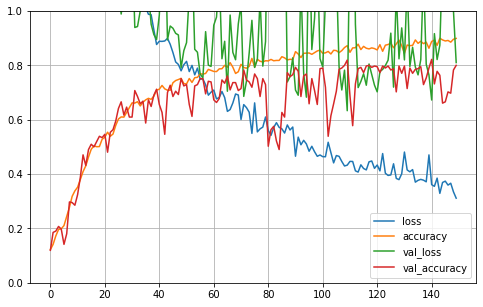

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
#Parameter 저장
model.save_weights(f'/content/drive/My Drive/cvision_1/params_6.h5')

#모델 구조 저장
model_json = model.to_json()
with open(f'/content/drive/My Drive/cvision_1/model_6.json', 'w') as json_file:
    json_file.write(model_json)


In [ ]:
#예측 진행
test_X = test.drop(['id', 'letter'], axis=1).values
test_X = test_X.reshape(-1, 28, 28, 1)
test_X = test_X/255.

res = model.predict_classes(test_X)

submission.digit = res
submission.to_csv('/content/drive/My Drive/cvision_1/my_subm_6.csv', index=False)

In [ ]:
#model_8인데 데이터 부풀리기 x, 학습률 감소 x
from tensorflow import keras
from tensorflow.keras import layers
#from kerastuner.tuners import RandomSearch

from keras import Sequential, Model
from keras.optimizers import Adam

from tensorflow.keras.layers import (
    Conv2D, BatchNormalization, Dropout,
    Flatten, Dense, Input, Concatenate, LeakyReLU, Add,
    Activation, BatchNormalization, MaxPooling2D
)

#데이터 증강
from tensorflow.keras.preprocessing.image import ImageDataGenerator
'''
datagen = ImageDataGenerator(rotation_range=10, #10도 돌림
                            zoom_range=0.1, #10퍼센트 확대(crop?)
                            width_shift_range=0.1,
                            height_shift_range=0.1)
'''
def model_fn():
    model = Sequential()
    
    model.add(Conv2D(input_shape = train_X.shape[1:], filters = 32, kernel_size = (3,3), strides = 2, padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Flatten())

    model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=Adam(0.002), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
#model_8인데 데이터 부풀리기 x, 학습률 감소 x
from tensorflow import keras
from tensorflow.keras import layers
#from kerastuner.tuners import RandomSearch

from keras import Sequential, Model
from keras.optimizers import Adam

from tensorflow.keras.layers import (
    Conv2D, BatchNormalization, Dropout,
    Flatten, Dense, Input, Concatenate, LeakyReLU, Add,
    Activation, BatchNormalization, MaxPooling2D
)

#데이터 증강
from tensorflow.keras.preprocessing.image import ImageDataGenerator
'''
datagen = ImageDataGenerator(rotation_range=10, #10도 돌림
                            zoom_range=0.1, #10퍼센트 확대(crop?)
                            width_shift_range=0.1,
                            height_shift_range=0.1)
'''
def model_fn():
    model = Sequential()
    
    model.add(Conv2D(input_shape = train_X.shape[1:], filters = 32, kernel_size = (3,3), strides = 2, padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Flatten())

    model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=Adam(0.002), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model = model_fn()
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_112 (Conv2D)          (None, 14, 14, 32)        320       
_________________________________________________________________
batch_normalization_110 (Bat (None, 14, 14, 32)        128       
_________________________________________________________________
activation_85 (Activation)   (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_113 (Conv2D)          (None, 14, 14, 32)        9248      
_________________________________________________________________
batch_normalization_111 (Bat (None, 14, 14, 32)        128       
_________________________________________________________________
activation_86 (Activation)   (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_114 (Conv2D)          (None, 14, 14, 32)      

In [ ]:
epochs = 150
batch_size = 32

history = model.fit_generator(
    datagen.flow(train_X, train_y, batch_size=batch_size),
    epochs = epochs,
    steps_per_epoch=train_X.shape[0]//batch_size,
    validation_data=(valid_X,valid_y),
    verbose=1
    #callbacks=[annealer]
)

print(
    f"CNN: Epochs={epochs:d}, " +
    f"Train accuracy={max(history.history['accuracy']):.5f}, " +
    f"Validation accuracy={max(history.history['val_accuracy']):.5f}"
)

Epoch 1/150
51/51 [==============================] - 5s 94ms/step - loss: 2.3911 - accuracy: 0.1189 - val_loss: 2.4627 - val_accuracy: 0.0829
Epoch 2/150
51/51 [==============================] - 5s 91ms/step - loss: 2.2707 - accuracy: 0.1526 - val_loss: 2.2515 - val_accuracy: 0.1439
Epoch 3/150
51/51 [==============================] - 5s 91ms/step - loss: 2.2277 - accuracy: 0.1644 - val_loss: 2.1891 - val_accuracy: 0.1512
Epoch 4/150
51/51 [==============================] - 5s 90ms/step - loss: 2.1912 - accuracy: 0.1843 - val_loss: 2.1703 - val_accuracy: 0.2024
Epoch 5/150
51/51 [==============================] - 5s 89ms/step - loss: 2.1634 - accuracy: 0.1961 - val_loss: 2.0834 - val_accuracy: 0.2707
Epoch 6/150
51/51 [==============================] - 4s 88ms/step - loss: 2.0759 - accuracy: 0.2379 - val_loss: 1.9980 - val_accuracy: 0.3561
Epoch 7/150
51/51 [==============================] - 5s 90ms/step - loss: 2.0803 - accuracy: 0.2291 - val_loss: 1.9770 - val_accuracy: 0.2951
Epoch 

KeyboardInterrupt: ignored

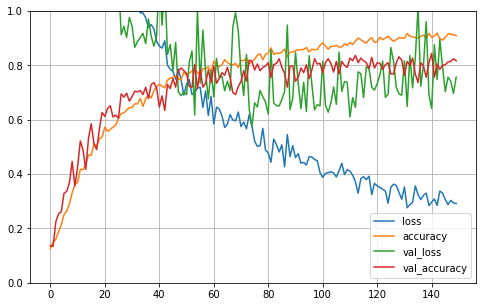

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
#Parameter 저장
model.save_weights(f'/content/drive/My Drive/cvision_1/params_9.h5')

#모델 구조 저장
model_json = model.to_json()
with open(f'/content/drive/My Drive/cvision_1/model_9.json', 'w') as json_file:
    json_file.write(model_json)


In [ ]:
#예측 진행
test_X = test.drop(['id', 'letter'], axis=1).values
test_X = test_X.reshape(-1, 28, 28, 1)
test_X = test_X/255.

res = model.predict_classes(test_X)

submission.digit = res
submission.to_csv('/content/drive/My Drive/cvision_1/my_subm_9.csv', index=False)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [5]:
#model_9-3 9-2에서 optimizer만 RMSprop로 바꿔봄
from tensorflow import keras
#from kerastuner.tuners import RandomSearch

from keras import Sequential, Model
from keras.optimizers import Adam, RMSprop

from tensorflow.keras.layers import (
    Conv2D, BatchNormalization, Dropout,
    Flatten, Dense, Input, Concatenate, LeakyReLU, Add,
    Activation, BatchNormalization, MaxPooling2D
)

#데이터 증강
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.1, #10퍼센트 확대
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range=0.1)

def model_fn():
    model = Sequential()
    
    model.add(Conv2D(16, (3,3), padding = 'same', activation = 'relu', kernel_initializer='he_normal', input_shape = train_X.shape[1:]))
    model.add(Conv2D(16, (3,3), padding = 'same', activation = 'relu', kernel_initializer='he_normal'))
    model.add(Conv2D(16, (3,3), padding = 'same', activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.4))

    model.add(Conv2D(32, (3,3), padding = 'same', activation = 'relu', kernel_initializer='he_normal'))
    model.add(Conv2D(32, (3,3), padding = 'same', activation = 'relu', kernel_initializer='he_normal'))
    model.add(Conv2D(32, (3,3), padding = 'same', activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.4))

    model.add(Conv2D(64, (3,3), strides = (2,2), padding = 'same', activation = 'relu', kernel_initializer='he_normal'))
    model.add(Conv2D(64, (3,3), strides = (2,2), padding = 'same', activation = 'relu', kernel_initializer='he_normal'))
    model.add(Conv2D(64, (3,3), strides = (2,2), padding = 'same', activation = 'relu', kernel_initializer='he_normal'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dense(10, activation='softmax'))

    #RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0), Adagrad(lr=0.01, epsilon=None, decay=0.0), adadelta, adam
    model.compile(optimizer=RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [6]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        9

In [23]:
'''#각 epoch마다 learning rate 낮춰줌
from tensorflow.keras.callbacks import LearningRateScheduler
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.99 ** x)'''

In [7]:
epochs = 230
batch_size = 32

history = model.fit(
    datagen.flow(train_X, train_y, batch_size=batch_size),
    epochs = epochs,
    steps_per_epoch=train_X.shape[0]//batch_size,
    validation_data=(valid_X,valid_y),
    verbose=1#, callbacks=[annealer]
)

print(
    f"CNN: Epochs={epochs:d}, " +
    f"Train accuracy={max(history.history['accuracy']):.5f}, " +
    f"Validation accuracy={max(history.history['val_accuracy']):.5f}"
)

Epoch 1/230
54/54 [==============================] - 5s 101ms/step - loss: 2.3118 - accuracy: 0.1030 - val_loss: 2.3005 - val_accuracy: 0.1104
Epoch 2/230
54/54 [==============================] - 5s 97ms/step - loss: 2.2927 - accuracy: 0.1189 - val_loss: 2.2913 - val_accuracy: 0.1494
Epoch 3/230
54/54 [==============================] - 5s 100ms/step - loss: 2.2314 - accuracy: 0.1610 - val_loss: 2.1972 - val_accuracy: 0.2240
Epoch 4/230
54/54 [==============================] - 5s 97ms/step - loss: 2.1231 - accuracy: 0.2278 - val_loss: 2.0444 - val_accuracy: 0.2532
Epoch 5/230
54/54 [==============================] - 5s 98ms/step - loss: 2.0230 - accuracy: 0.2734 - val_loss: 1.8532 - val_accuracy: 0.3052
Epoch 6/230
54/54 [==============================] - 5s 102ms/step - loss: 1.9582 - accuracy: 0.3109 - val_loss: 1.8279 - val_accuracy: 0.4610
Epoch 7/230
54/54 [==============================] - 5s 100ms/step - loss: 1.8705 - accuracy: 0.3478 - val_loss: 1.7646 - val_accuracy: 0.3766
Ep

54/54 [==============================] - 5s 98ms/step - loss: 0.4600 - accuracy: 0.8431 - val_loss: 0.4461 - val_accuracy: 0.8442
Epoch 116/230
54/54 [==============================] - 5s 99ms/step - loss: 0.4399 - accuracy: 0.8378 - val_loss: 0.5403 - val_accuracy: 0.8442
Epoch 117/230
54/54 [==============================] - 5s 99ms/step - loss: 0.4624 - accuracy: 0.8437 - val_loss: 0.3962 - val_accuracy: 0.8766
Epoch 118/230
54/54 [==============================] - 5s 99ms/step - loss: 0.4474 - accuracy: 0.8507 - val_loss: 0.4583 - val_accuracy: 0.8539
Epoch 119/230
54/54 [==============================] - 5s 98ms/step - loss: 0.4536 - accuracy: 0.8432 - val_loss: 0.4659 - val_accuracy: 0.8442
Epoch 120/230
54/54 [==============================] - 5s 98ms/step - loss: 0.4516 - accuracy: 0.8530 - val_loss: 0.4797 - val_accuracy: 0.8279
Epoch 121/230
54/54 [==============================] - 5s 97ms/step - loss: 0.4592 - accuracy: 0.8431 - val_loss: 0.4402 - val_accuracy: 0.8636
Epoch 

Epoch 172/230
54/54 [==============================] - 5s 100ms/step - loss: 0.3719 - accuracy: 0.8741 - val_loss: 0.4215 - val_accuracy: 0.8539
Epoch 173/230
54/54 [==============================] - 5s 100ms/step - loss: 0.3567 - accuracy: 0.8753 - val_loss: 0.4478 - val_accuracy: 0.8344
Epoch 174/230
54/54 [==============================] - 5s 99ms/step - loss: 0.3792 - accuracy: 0.8759 - val_loss: 0.4861 - val_accuracy: 0.8377
Epoch 175/230
54/54 [==============================] - 5s 101ms/step - loss: 0.3725 - accuracy: 0.8753 - val_loss: 0.4486 - val_accuracy: 0.8474
Epoch 176/230
54/54 [==============================] - 5s 101ms/step - loss: 0.3888 - accuracy: 0.8712 - val_loss: 0.4842 - val_accuracy: 0.8312
Epoch 177/230
54/54 [==============================] - 6s 102ms/step - loss: 0.3739 - accuracy: 0.8759 - val_loss: 0.4577 - val_accuracy: 0.8442
Epoch 178/230
54/54 [==============================] - 6s 107ms/step - loss: 0.3433 - accuracy: 0.8829 - val_loss: 0.4891 - val_acc

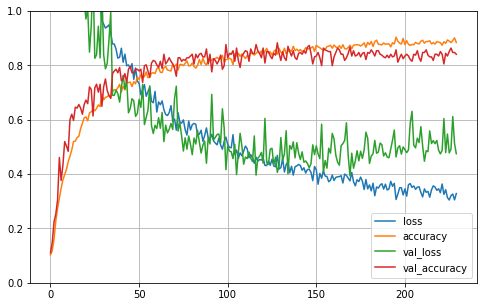

In [9]:
#맥스풀링 마지막에만 하고 FC두번 거쳐서 하니 느리지만 꾸준히 정확도 증가 80에서 거의 멈춤 - 해결 방안?
#epoch 180정도로 한 결과 = model_9
#model_9는 0.89166, 0.87805
#model_9-2를 eopch 230, relu 대신 leaky relu

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [11]:
#Parameter 저장
model.save_weights(f'data/cvision/params_9.h5')

#모델 구조 저장
model_json = model.to_json()
with open(f'data/cvision/model_9.json', 'w') as json_file:
    json_file.write(model_json)


In [12]:
#예측 진행
test_X = test.drop(['id', 'letter'], axis=1).values
test_X = test_X.reshape(-1, 28, 28, 1)
test_X = test_X/255.

res = model.predict_classes(test_X)

submission.digit = res
submission.to_csv('data/cvision/my_subm_9.csv', index=False)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [136]:
#model_9-4
from tensorflow import keras
#from kerastuner.tuners import RandomSearch

from keras import Sequential, Model
from keras.optimizers import Adam, RMSprop

from tensorflow.keras.layers import (
    Conv2D, BatchNormalization, Dropout,
    Flatten, Dense, Input, Concatenate, LeakyReLU, Add,
    Activation, BatchNormalization, MaxPooling2D
)

#데이터 증강
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.10, #10퍼센트 확대
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range=0.1)

def model_fn():
    model = Sequential()
    
    model.add(Conv2D(8, (3,3), padding = 'same', kernel_initializer='he_normal', input_shape = train_X.shape[1:]))
    model.add(LeakyReLU(alpha=0.001))
    model.add(Conv2D(8, (3,3), padding = 'same', kernel_initializer='he_normal'))
    model.add(LeakyReLU(alpha=0.001))
    model.add(MaxPooling2D(pool_size = (2,2), strides=2))
    model.add(Dropout(0.4))

    model.add(Conv2D(16, (3,3), padding = 'same', kernel_initializer='he_normal'))
    model.add(LeakyReLU(alpha=0.001))
    model.add(Conv2D(16, (3,3), padding = 'same', kernel_initializer='he_normal'))
    model.add(LeakyReLU(alpha=0.001))
    model.add(Dropout(0.4))

    model.add(Conv2D(32, (3,3), padding = 'same', kernel_initializer='he_normal'))
    model.add(LeakyReLU(alpha=0.001))
    model.add(Conv2D(32, (3,3), padding = 'same', kernel_initializer='he_normal'))
    model.add(LeakyReLU(alpha=0.001))
    model.add(MaxPooling2D(pool_size = (2,2), strides=2))
    model.add(Dropout(0.4))

    model.add(Conv2D(64, (3,3), padding = 'same', kernel_initializer='he_normal'))
    model.add(LeakyReLU(alpha=0.001))
    model.add(Conv2D(64, (3,3), padding = 'same', kernel_initializer='he_normal'))
    model.add(LeakyReLU(alpha=0.001))
    model.add(MaxPooling2D(pool_size = (2,2), strides=2))
    model.add(Dropout(0.4))
    
    model.add(Flatten())
    model.add(Dense(52, kernel_initializer='he_normal'))
    model.add(LeakyReLU(alpha=0.001))
    model.add(Dropout(0.4))
    model.add(Dense(10, activation='softmax'))

    #RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0), Adagrad(lr=0.01, epsilon=None, decay=0.0), adadelta, adam
    model.compile(optimizer=RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [137]:
model = model_fn()
model.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_332 (Conv2D)          (None, 28, 28, 8)         80        
_________________________________________________________________
leaky_re_lu_336 (LeakyReLU)  (None, 28, 28, 8)         0         
_________________________________________________________________
conv2d_333 (Conv2D)          (None, 28, 28, 8)         584       
_________________________________________________________________
leaky_re_lu_337 (LeakyReLU)  (None, 28, 28, 8)         0         
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_129 (Dropout)        (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_334 (Conv2D)          (None, 14, 14, 16)      

In [ ]:
epochs = 2000
batch_size = 1024

history = model.fit(
    datagen.flow(train_X, train_y, batch_size=batch_size),
    epochs = epochs,
    steps_per_epoch=train_X.shape[0]//batch_size,
    validation_data=(valid_X,valid_y),
    verbose=1#, callbacks=[annealer]
)

print(
    f"CNN: Epochs={epochs:d}, " +
    f"Train accuracy={max(history.history['accuracy']):.5f}, " +
    f"Validation accuracy={max(history.history['val_accuracy']):.5f}"
)

Epoch 1/2000
1/1 [==============================] - 0s 301ms/step - loss: 2.6192 - accuracy: 0.0993 - val_loss: 2.3045 - val_accuracy: 0.1171
Epoch 2/2000
1/1 [==============================] - 0s 84ms/step - loss: 2.3165 - accuracy: 0.0938 - val_loss: 2.3028 - val_accuracy: 0.1122
Epoch 3/2000
1/1 [==============================] - 0s 85ms/step - loss: 2.2961 - accuracy: 0.1162 - val_loss: 2.3025 - val_accuracy: 0.1024
Epoch 4/2000
1/1 [==============================] - 0s 74ms/step - loss: 2.3054 - accuracy: 0.1016 - val_loss: 2.3025 - val_accuracy: 0.1122
Epoch 5/2000
1/1 [==============================] - 0s 69ms/step - loss: 2.3009 - accuracy: 0.0977 - val_loss: 2.3013 - val_accuracy: 0.1000
Epoch 6/2000
1/1 [==============================] - 0s 85ms/step - loss: 2.3031 - accuracy: 0.0977 - val_loss: 2.3009 - val_accuracy: 0.1049
Epoch 7/2000
1/1 [==============================] - 0s 85ms/step - loss: 2.2996 - accuracy: 0.1143 - val_loss: 2.3006 - val_accuracy: 0.1122
Epoch 8/2000

In [ ]:
#####relu 대신 leaky relu 써보자########
#####후에 early stopping도 추가 ########

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [112]:
#model_9-5
from tensorflow import keras
#from kerastuner.tuners import RandomSearch

from keras import Sequential, Model
from keras.optimizers import Adam, RMSprop

from tensorflow.keras.layers import (
    Conv2D, BatchNormalization, Dropout,
    Flatten, Dense, Input, Concatenate, LeakyReLU, Add,
    Activation, BatchNormalization, MaxPooling2D
)

#데이터 증강
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.1, #10퍼센트 확대
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range=0.1)

def model_fn():
    model = Sequential()
    
    model.add(Conv2D(16, (3,3), padding = 'same', kernel_initializer='he_normal', input_shape = train_X.shape[1:]))
    model.add(LeakyReLU(alpha=0.001))
    model.add(Conv2D(16, (3,3), padding = 'same', kernel_initializer='he_normal'))
    model.add(LeakyReLU(alpha=0.001))
    model.add(Conv2D(16, (3,3), padding = 'same', kernel_initializer='he_normal'))
    model.add(LeakyReLU(alpha=0.001))
    model.add(MaxPooling2D(pool_size = (2,2), strides=2))
    model.add(Dropout(0.4))

    model.add(Conv2D(32, (3,3), padding = 'same', kernel_initializer='he_normal'))
    model.add(LeakyReLU(alpha=0.001))
    model.add(Conv2D(32, (3,3), padding = 'same', kernel_initializer='he_normal'))
    model.add(LeakyReLU(alpha=0.001))
    model.add(Conv2D(32, (3,3), padding = 'same', kernel_initializer='he_normal'))
    model.add(LeakyReLU(alpha=0.001))
    model.add(Dropout(0.4))

    model.add(Conv2D(64, (3,3), padding = 'same', kernel_initializer='he_normal'))
    model.add(LeakyReLU(alpha=0.001))
    model.add(Conv2D(64, (3,3), padding = 'same', kernel_initializer='he_normal'))
    model.add(LeakyReLU(alpha=0.001))
    model.add(Conv2D(64, (3,3), padding = 'same', kernel_initializer='he_normal'))
    model.add(LeakyReLU(alpha=0.001))
    model.add(MaxPooling2D(pool_size = (2,2), strides=2))
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dense(52, kernel_initializer='he_normal'))
    model.add(LeakyReLU(alpha=0.001))
    model.add(Dropout(0.4))
    model.add(Dense(10, activation='softmax'))

    #RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0), Adagrad(lr=0.01, epsilon=None, decay=0.0), adadelta, adam
    model.compile(optimizer=RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [113]:
model = model_fn()
model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_280 (Conv2D)          (None, 28, 28, 16)        160       
_________________________________________________________________
leaky_re_lu_278 (LeakyReLU)  (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_281 (Conv2D)          (None, 28, 28, 16)        2320      
_________________________________________________________________
leaky_re_lu_279 (LeakyReLU)  (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_282 (Conv2D)          (None, 28, 28, 16)        2320      
_________________________________________________________________
leaky_re_lu_280 (LeakyReLU)  (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 14, 14, 16)      

In [ ]:
epochs = 800
batch_size = 1024

history = model.fit(
    datagen.flow(train_X, train_y, batch_size=batch_size),
    epochs = epochs,
    steps_per_epoch=train_X.shape[0]//batch_size,
    validation_data=(valid_X,valid_y),
    verbose=1#, callbacks=[annealer]
)

print(
    f"CNN: Epochs={epochs:d}, " +
    f"Train accuracy={max(history.history['accuracy']):.5f}, " +
    f"Validation accuracy={max(history.history['val_accuracy']):.5f}"
)

Epoch 1/800
1/1 [==============================] - 0s 370ms/step - loss: 2.6487 - accuracy: 0.0996 - val_loss: 2.3282 - val_accuracy: 0.0659
Epoch 2/800
1/1 [==============================] - 0s 154ms/step - loss: 2.3942 - accuracy: 0.1064 - val_loss: 2.3022 - val_accuracy: 0.0805
Epoch 3/800
1/1 [==============================] - 0s 160ms/step - loss: 2.2992 - accuracy: 0.1104 - val_loss: 2.3015 - val_accuracy: 0.0805
Epoch 4/800
1/1 [==============================] - 0s 120ms/step - loss: 2.3029 - accuracy: 0.0765 - val_loss: 2.3014 - val_accuracy: 0.0561
Epoch 5/800
1/1 [==============================] - 0s 155ms/step - loss: 2.3019 - accuracy: 0.1025 - val_loss: 2.3019 - val_accuracy: 0.0805
Epoch 6/800
1/1 [==============================] - 0s 130ms/step - loss: 2.3020 - accuracy: 0.1075 - val_loss: 2.3009 - val_accuracy: 0.1024
Epoch 7/800
1/1 [==============================] - 0s 125ms/step - loss: 2.3001 - accuracy: 0.0977 - val_loss: 2.3004 - val_accuracy: 0.0878
Epoch 8/800
1

Epoch 59/800
1/1 [==============================] - 0s 140ms/step - loss: 2.0448 - accuracy: 0.2520 - val_loss: 1.8538 - val_accuracy: 0.3829
Epoch 60/800
1/1 [==============================] - 0s 120ms/step - loss: 2.0149 - accuracy: 0.2899 - val_loss: 1.9932 - val_accuracy: 0.2902
Epoch 61/800
1/1 [==============================] - 0s 112ms/step - loss: 2.0633 - accuracy: 0.2524 - val_loss: 1.8597 - val_accuracy: 0.3707
Epoch 62/800
1/1 [==============================] - 0s 135ms/step - loss: 2.0003 - accuracy: 0.2915 - val_loss: 1.9880 - val_accuracy: 0.3463
Epoch 63/800
1/1 [==============================] - 0s 125ms/step - loss: 2.0027 - accuracy: 0.2899 - val_loss: 1.7662 - val_accuracy: 0.3829
Epoch 64/800
1/1 [==============================] - 0s 160ms/step - loss: 2.0917 - accuracy: 0.2832 - val_loss: 2.2005 - val_accuracy: 0.3439
Epoch 65/800
1/1 [==============================] - 0s 130ms/step - loss: 2.2000 - accuracy: 0.2264 - val_loss: 2.0731 - val_accuracy: 0.3902
Epoch 

In [ ]:
#####relu 대신 leaky relu 써보자########
#####후에 early stopping도 추가 ########

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [140]:
#model_10
from tensorflow import keras
from tensorflow.keras import layers
#from kerastuner.tuners import RandomSearch

from keras import Sequential, Model
from keras.optimizers import Adam

from tensorflow.keras.layers import (
    Conv2D, BatchNormalization, Dropout,
    Flatten, Dense, Input, Concatenate, LeakyReLU, PReLU, 
    Add, Activation, BatchNormalization, MaxPooling2D
)

#데이터 증강
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.1, #10퍼센트 확대
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range=0.1)

def model_fn():
    model = Sequential()

    model.add(Conv2D(32, (3,3), padding = 'same', kernel_initializer='he_normal', input_shape = train_X.shape[1:]))
    model.add(LeakyReLU(alpha=0.001))
    model.add(Conv2D(32, (3,3), padding = 'same', kernel_initializer='he_normal'))
    model.add(LeakyReLU(alpha=0.001))
    model.add(MaxPooling2D(pool_size = (2,2), strides=2))

    model.add(Conv2D(32, (3,3), padding = 'same', kernel_initializer='he_normal'))
    model.add(LeakyReLU(alpha=0.001))
    model.add(Conv2D(32, (3,3), padding = 'same', kernel_initializer='he_normal'))
    model.add(LeakyReLU(alpha=0.001))
    model.add(MaxPooling2D(pool_size = (2,2), strides=2))

    model.add(Flatten())
    model.add(Dense(64, kernel_initializer='he_normal'))
    model.add(LeakyReLU(alpha=0.001))
    model.add(Dropout(0.3))

    model.add(Dense(64, kernel_initializer='he_normal'))
    model.add(LeakyReLU(alpha=0.001))
    model.add(Dropout(0.3))

    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [141]:
model = model_fn()
model.summary()

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_185 (Conv2D)          (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_31 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_186 (Conv2D)          (None, 28, 28, 32)        9248      
_________________________________________________________________
leaky_re_lu_32 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_80 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_187 (Conv2D)          (None, 14, 14, 32)        9248      
_________________________________________________________________
leaky_re_lu_33 (LeakyReLU)   (None, 14, 14, 32)      

In [142]:
#각 epoch마다 learning rate 낮춰줌
from tensorflow.keras.callbacks import LearningRateScheduler
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.975 ** x)

In [ ]:
epochs = 150
batch_size = 32

history = model.fit(
    datagen.flow(train_X, train_y, batch_size=batch_size),
    epochs = epochs,
    steps_per_epoch=train_X.shape[0]//batch_size,
    validation_data=(valid_X,valid_y),
    verbose=1,
    callbacks=[annealer]
)

print(
    f"CNN: Epochs={epochs:d}, " +
    f"Train accuracy={max(history.history['accuracy']):.5f}, " +
    f"Validation accuracy={max(history.history['val_accuracy']):.5f}"
)

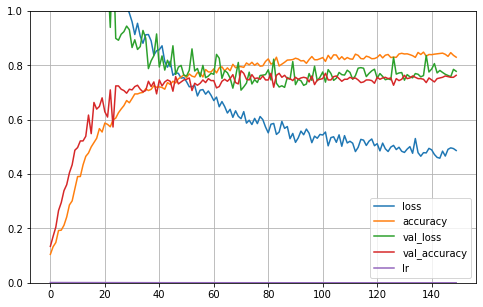

In [144]:
#9까지는 콘볼루션 층 9개에 맥스풀링과 FC 첨가해서 필터 수나 러닝 레이트만 조절해봄
#이번 model_10은 LeNet 참고하여 비슷한 구조로 얕게 층 쌓음 - 훈련 모델에 대한 오버피팅 심함

#conv 층과 maxpooling 층에 strides=2 추가해서 해봄

#randomsearch로 learning rate 등 하이퍼 파라미터 조절해보기
#차라리 learning rate 줄이고 많이 시도? 진동하는 경향이 좀 보임 epoch 75부터 계~~~~속 0.7대 유지 - epoch 161 아직도 탈출 못함
#0.003으로 했을 때 진동하는 듯 해서 0.001로 다시 돌아옴 - 근데 학습률이 낮아도 마찬가지로 local 최적에 빠지지 않을까? - global 최적 찾을 방법은??
#이것도 진동에 빠진다면 0.002로 시도해보기

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
#model_11 - 모델 10에서 Leaky ReLU나 PReLU나 Maxout 시도해보기
#아무튼 적당한 활성화 함수 찾은 후 RandomSearch로 하이퍼파라미터 최적화
from tensorflow import keras
from tensorflow.keras import layers
#from kerastuner.tuners import RandomSearch

from keras import Sequential, Model
from keras.optimizers import Adam

from tensorflow.keras.layers import (
    Conv2D, BatchNormalization, Dropout,
    Flatten, Dense, Input, Concatenate, LeakyReLU, PReLU, 
    Add, Activation, BatchNormalization, MaxPooling2D
)

#데이터 증강
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.1, #10퍼센트 확대
                             width_shift_range=0.1,
                             height_shift_range=0.1)

def model_fn():
    model = Sequential()
    
    model.add(Conv2D(16, (3,3), padding = 'same', kernel_initializer='he_normal', input_shape = train_X.shape[1:]))
    model.add(LeakyReLU(alpha=0.001))
    model.add(Conv2D(16, (3,3), padding = 'same', kernel_initializer='he_normal'))
    model.add(LeakyReLU(alpha=0.001))
    model.add(Conv2D(16, (3,3), padding = 'same', kernel_initializer='he_normal'))
    model.add(LeakyReLU(alpha=0.001))
    model.add(Dropout(0.4))

    model.add(Conv2D(32, (3,3), padding = 'same', kernel_initializer='he_normal'))
    model.add(LeakyReLU(alpha=0.001))
    model.add(Conv2D(32, (3,3), padding = 'same', kernel_initializer='he_normal'))
    model.add(LeakyReLU(alpha=0.001))
    model.add(Conv2D(32, (3,3), padding = 'same', kernel_initializer='he_normal'))
    model.add(LeakyReLU(alpha=0.001))
    model.add(Dropout(0.4))

    model.add(Conv2D(64, (3,3), strides = (2,2), padding = 'same', kernel_initializer='he_normal'))
    model.add(LeakyReLU(alpha=0.001))
    model.add(Conv2D(64, (3,3), strides = (2,2), padding = 'same', kernel_initializer='he_normal'))
    model.add(LeakyReLU(alpha=0.001))
    model.add(Conv2D(64, (3,3), strides = (2,2), padding = 'same', kernel_initializer='he_normal'))
    model.add(LeakyReLU(alpha=0.001))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(LeakyReLU(alpha=0.001))
    model.add(Dropout(0.4))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model = model_fn()
model.summary()

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_354 (Conv2D)          (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_355 (Conv2D)          (None, 28, 28, 16)        2320      
_________________________________________________________________
conv2d_356 (Conv2D)          (None, 28, 28, 16)        2320      
_________________________________________________________________
dropout_119 (Dropout)        (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_357 (Conv2D)          (None, 28, 28, 32)        4640      
_________________________________________________________________
conv2d_358 (Conv2D)          (None, 28, 28, 32)        9248      
_________________________________________________________________
conv2d_359 (Conv2D)          (None, 28, 28, 32)      

In [ ]:
#각 epoch마다 learning rate 낮춰줌
from tensorflow.keras.callbacks import LearningRateScheduler
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.975 ** x)

In [ ]:
epochs = 230
batch_size = 32

history = model.fit(
    datagen.flow(train_X, train_y, batch_size=batch_size),
    epochs = epochs,
    steps_per_epoch=train_X.shape[0]//batch_size,
    validation_data=(valid_X,valid_y),
    verbose=1,
    callbacks=[annealer]
)

print(
    f"CNN: Epochs={epochs:d}, " +
    f"Train accuracy={max(history.history['accuracy']):.5f}, " +
    f"Validation accuracy={max(history.history['val_accuracy']):.5f}"
)

Epoch 1/230
51/51 [==============================] - 13s 250ms/step - loss: 2.3267 - accuracy: 0.1133 - val_loss: 2.2999 - val_accuracy: 0.1244
Epoch 2/230
51/51 [==============================] - 13s 255ms/step - loss: 2.3001 - accuracy: 0.1121 - val_loss: 2.2979 - val_accuracy: 0.1098
Epoch 3/230
51/51 [==============================] - 13s 258ms/step - loss: 2.2959 - accuracy: 0.1146 - val_loss: 2.2889 - val_accuracy: 0.1463
Epoch 4/230
34/51 [===================>..........] - ETA: 6s - loss: 2.3013 - accuracy: 0.1094

In [ ]:
test_loss, test_acc = model.evaluate(valid_X, valid_y, verbose=2)
print('테스트 손실함수:', test_loss, '\n테스트 정확도:', test_acc)

13/13 - 0s - loss: 0.8377 - accuracy: 0.7854
테스트 손실함수: 0.8376531004905701 
테스트 정확도: 0.785365879535675


시도해볼 것: maxout은 dropout과 함께 쓰면 효과가 좋은 활성화함수라고 함
    - maxout 적용 예제 / 코드 찾아서 직접 사용해보기
    - maxout의 단점은 파라미터의 수가 두배가 된다는 점
             maxpooling만 쓰지 말고 각 방법의 장단점 파악 후 새롭게 적용해보기

Summary
Stanford의 CS231n 강의에서는 다음과 같은 순서로 Activation function을 시도해볼 것을 권한다.

(1) ReLU를 사용하자.

(2) 성능이 만족스럽지 않다면, LeakyReLU, Maxout, ELU를 사용하라.

(3) 그래도 만족스럽지 않다면, tanh를 사용하라. 하지만 많은 기대는 하지말자.

(4) 그러나 Sigmoid는 사용하지 말라.

실무적으로는 ReLU를 가장 많이 사용하며, LeakyReLU/Maxout/ELU도 좋은 선택지가 될 수 있다.


learning rate 점점 감소 시켰을 때: 0.7941

그냥 없이 했을 때: 0.8284

model_5: train - 0.87, valid - 0.82

model_6: Train accuracy=0.89975, Validation accuracy=0.82195

강아지 품종 분류 cnn, 데이터 부풀리기 비교 예제

# https://lsjsj92.tistory.com/387

cnn
# https://m.blog.naver.com/laonple/221212462034

https://m.blog.naver.com/laonple/220808903260

# https://buomsoo-kim.github.io/keras/2018/05/05/Easy-deep-learning-with-Keras-11.md/

https://machine-geon.tistory.com/46

https://excelsior-cjh.tistory.com/152

cnn 정확도 높이기

https://manofconcrete.blogspot.com/2019/12/mnist-hands-on-3.html

randpm search vs grid search

https://shwksl101.github.io/ml/dl/2019/01/30/Hyper_parameter_optimization.html

케라스 튜너
# https://github.com/keras-team/keras-tuner
https://tykimos.github.io/2019/05/10/KerasTuner/

https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

In [ ]:
'''def model_fn():
    LR = Choice('learning_rate', [0.001, 0.0005, 0.0001], group='optimizer')
    DROPOUT_RATE = Linear('dropout_rate', 0.0, 0.5, 5, group='dense')
    NUM_DIMS = Range('num_dims', 8, 32, 8, group='dense')
    NUM_LAYERS = Range('num_layers', 1, 3, group='dense')
    L2_NUM_FILTERS = Range('l2_num_filters', 8, 64, 8, group='cnn')
    L1_NUM_FILTERS = Range('l1_num_filters', 8, 64, 8, group='cnn')

    model = Sequential()
    model.add(Conv2D(L1_NUM_FILTERS, kernel_size=(3, 3), activation='relu'), input_shape = train_X.shape[1:])
    model.add(Conv2D(L2_NUM_FILTERS, kernel_size=(3, 3), activation='relu'))
    model.add(Flatten())
    for _ in range(NUM_LAYERS):
        model.add(Dense(NUM_DIMS, activation='relu'))
        model.add(Dropout(DROPOUT_RATE))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=Adam(LR), metrics=['accuracy'])

    return model'''

In [ ]:
'''def create_cnn_model(train_x):
    inputs = tf.keras.layers.Input(train_x.shape[1:])
    
    bn = tf.keras.layers.BatchNormalization()(inputs)
    conv = tf.keras.layers.Conv2D(128, kernel_size=5, strides=1, padding='same', activation='relu')(bn)
    bn = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.Conv2D(128, kernel_size=2, strides=1, padding='same', activation='relu')(bn)
    pool = tf.keras.layers.MaxPooling2D((2,2))(conv)
    
    bn = tf.keras.layers.BatchNormalization()(pool)
    conv = tf.keras.layers.Conv2D(256, kernel_size=2, strides=1, padding='same', activation='relu')(bn)
    bn = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.Conv2D(256, kernel_size=2, strides=1, padding='same', activation='relu')(bn)
    pool = tf.keras.layers.MaxPooling2D((2,2))(conv)
    
    flatten = tf.keras.layers.Flatten()(pool)
    
    bn = tf.keras.layers.BatchNormalization()(flatten)
    dense = tf.keras.layers.Dense(1000, activation='relu')(bn)

    bn = tf.keras.layers.BatchNormalization()(dense)
    outputs = tf.keras.layers.Dense(10, activation='softmax')(bn)

    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

    return model'''

In [ ]:
'''model = create_cnn_model(train_X)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_X, train_y, epochs=20)'''

In [ ]:
'''test_loss, test_acc = model.evaluate(valid_X, valid_y, verbose=2)
print('테스트 손실함수:', test_loss, '\n테스트 정확도:', test_acc)'''

https://excelsior-cjh.tistory.com/152

In [ ]:
'''import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import cv2

np.random.seed(0)

train = pd.read_csv('./data/cvision/train.csv')
train_x = train.iloc[:,3:].values.reshape(-1,28,28)
data = train_x[0]
data.shape'''

In [ ]:
'''#상하좌우 이동
samples = np.expand_dims(data, 0)

#Generator 생성
#range를 설정해 얼마나 움직일지 정해줌
gen = ImageDataGenerator(width_shift_range=[-10,10])

#figure 생성
fig = plt.figure(figsize=(28,28))

#it
it = gen.flow(samples, batch_size=1)

#9개 이미지 생성
for i in range(9):
    plt.subplot(3,3,i+1)
    
    batch = it.next()
    img = batch[0].astype('uint8')
    
    #plot raw pixel data
    plt.imshow(img)
    
#show the figure
plt.title('moving')
plt.show()'''

In [ ]:
#ResNet - Residual Block

'''
from keras import layers

def residual_block(x, filters_in, filters_out, k_size):
    shortcut = x
    x = layers.Conv2D(filters_in, kernel_size=(1, 1), strides=(1, 1), padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)
    
    x = layers.Conv2D(filters_in, kernel_size=(k_size, k_size), strides=(1, 1), padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)    
    
    x = layers.Conv2D(filters_out, kernel_size=(1, 1), strides=(1, 1), padding="same")(x)
    x = layers.BatchNormalization()(x)
    
    shortcut_channel = x.shape.as_list()[-1]
    
    if shortcut_channel != filters_out:
        shortcut = layers.Conv2D(filters_out, kernel_size=(1, 1), strides=(1, 1), padding="same")(shortcut)
        
    x = layers.Add()([x, shortcut])
    return layers.LeakyReLU()(x)
'''